<a href="https://colab.research.google.com/github/anand176/AppleRipeningDetection/blob/master/JackFruitBh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [3]:
#CREATING LABELS FOR RESIZED IMAGES
#RIPE=1,UNRIPE=0
import os
labels=[]
c1,c2=0,0
file_names=os.listdir('/content/drive/MyDrive/resized')
print(file_names)
for file in file_names:
    if file[0]=='r':
        c1=c1+1
        labels.append(1)
    else:
        c2=c2+1
        labels.append(0)
print(c1,c2)

['ripe_0_1333.jpeg', 'ripe_0_1278.jpeg', 'ripe_0_1901.jpeg', 'ripe_0_1572.jpeg', 'ripe_0_1284.jpeg', 'ripe_0_1886.jpeg', 'ripe_0_1235.jpeg', 'ripe_0_1708.jpeg', 'ripe_0_1302.jpeg', 'ripe_0_1111.jpeg', 'ripe_0_1037.jpeg', 'ripe_0_1976.jpeg', 'ripe_0_1044.jpeg', 'ripe_0_1000.jpeg', 'ripe_0_2008.jpeg', 'ripe_0_1649.jpeg', 'ripe_0_1827.jpeg', 'ripe_0_1378.jpeg', 'ripe_0_1918.jpeg', 'ripe_0_1010.jpeg', 'ripe_0_1528.jpeg', 'ripe_0_1920.jpeg', 'ripe_0_1943.jpeg', 'ripe_0_1306.jpeg', 'ripe_0_2211.jpeg', 'ripe_0_1140.jpeg', 'ripe_0_117.jpeg', 'ripe_0_1339.jpeg', 'ripe_0_1975.jpeg', 'ripe_0_1630.jpeg', 'ripe_0_1752.jpeg', 'ripe_0_1567.jpeg', 'ripe_0_219.jpeg', 'ripe_0_1562.jpeg', 'ripe_0_1966.jpeg', 'ripe_0_1279.jpeg', 'ripe_0_1551.jpeg', 'ripe_0_1713.jpeg', 'ripe_0_2101.jpeg', 'ripe_0_1845.jpeg', 'ripe_0_206.jpeg', 'ripe_0_1755.jpeg', 'ripe_0_1162.jpeg', 'ripe_0_1351.jpeg', 'ripe_0_1523.jpeg', 'ripe_0_1928.jpeg', 'ripe_0_1961.jpeg', 'ripe_0_1370.jpeg', 'ripe_0_1536.jpeg', 'ripe_0_1895.jpeg', 'r

In [9]:
import cv2
import glob
image_directory='/content/drive/MyDrive/resized/'
image_extension=['png','jpg']
files=[]
# matching_files = glob.glob(directory + '*.jpg')
print(files)
[files.extend(glob.glob(image_directory+'*.jpeg'))]
images_array=np.asarray([cv2.imread(file) for file in files])
print(type(images_array))
# print(images_array)
print(images_array.shape)


[]
<class 'numpy.ndarray'>
(904, 224, 224, 3)


In [10]:
X=images_array
Y=np.asarray(labels)

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['acc']

# )

In [17]:
model.fit(X_train_scaled,Y_train,epochs=20)

Epoch 1/20
23/23 [==============================] - 113s 5s/step - loss: 1.9004 - accuracy: 0.9087
Epoch 2/20
23/23 [==============================] - 111s 5s/step - loss: 2.3613 - accuracy: 0.9488
Epoch 3/20
23/23 [==============================] - 107s 5s/step - loss: 0.5228 - accuracy: 0.9765
Epoch 4/20
23/23 [==============================] - 111s 5s/step - loss: 1.7898 - accuracy: 0.9627
Epoch 5/20
23/23 [==============================] - 117s 5s/step - loss: 0.7147 - accuracy: 0.9710
Epoch 6/20
23/23 [==============================] - 112s 5s/step - loss: 0.3898 - accuracy: 0.9876
Epoch 7/20
23/23 [==============================] - 110s 5s/step - loss: 1.1622 - accuracy: 0.9806
Epoch 8/20
23/23 [==============================] - 109s 5s/step - loss: 1.3574 - accuracy: 0.9765
Epoch 9/20
23/23 [==============================] - 109s 5s/step - loss: 0.2039 - accuracy: 0.9917
Epoch 10/20
23/23 [==============================] - 111s 5s/step - loss: 0.3441 - accuracy: 0.9903
Epoch 11/

In [18]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('test loss=',score)
print('test accuracy=',acc)

6/6 [==============================] - 9s 2s/step - loss: 0.6655 - accuracy: 0.9834
test loss= 0.6654833555221558
test accuracy= 0.9834254384040833


In [29]:
from google.colab.patches import cv2_imshow
import cv2

# Attempt to read the image
input_image = cv2.imread('/content/ripe_0_33.jpeg')

# Check if image reading was successful
if input_image is not None:
    # Display the image
    cv2_imshow(input_image)
else:
    print("Failed to read the image file. Please check the file path and format.")

SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-29-b9d0b3c7a230>, line 5)

path of img to be predicted:/content/ripe_0_33.jpeg


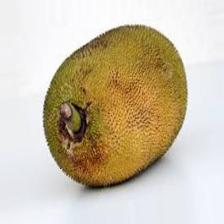

[[[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 238 238]
  [240 238 238]
  [240 238 238]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [241 239 239]
  [241 239 239]
  [241 239 239]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [241 239 239]
  [241 239 239]
  [241 239 239]]

 ...

 [[248 243 242]
  [248 243 242]
  [248 243 242]
  ...
  [253 244 241]
  [253 244 241]
  [253 244 241]]

 [[248 243 242]
  [248 243 242]
  [248 243 242]
  ...
  [253 244 241]
  [253 244 241]
  [253 244 241]]

 [[248 243 242]
  [248 243 242]
  [248 243 242]
  ...
  [253 244 241]
  [253 244 241]
  [253 244 241]]]
1/1 [==============================] - 0s 60ms/step
1.0
ripe


In [30]:
input_image_path=input('path of img to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
print(input_image_resize)
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
# input_pred_label=np.argmax(input_prediction)
# print(input_pred_label)
print(input_prediction[0][0])
if input_prediction[0][0]>.5:
  # .59 is just the approx value
  print('ripe')
else:
  print('unripe')

In [21]:
from ast import In
min1,max1=0,0
c1,c2=0,0
for file in file_names:
  # input_image_path='/content/drive/MyDrive/resized_shuffled/file'
  input_image_path = '/content/drive/MyDrive/resized/' + file
  input_image=cv2.imread(input_image_path)
  # cv2_imshow(input_image)
  input_image_resize=cv2.resize(input_image,(224,224))
  input_image_scaled=input_image_resize/255
  image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
  # print(image_reshaped)
  input_prediction=model.predict(image_reshaped)
  # if file[0]=="r":
  #   min1=min1+input_prediction[0]
  #   c1=c1+1
  # else:
  #   max1=max1+input_prediction[0]
  #   c2=c2+1
  # print(input_prediction)
  input_pred_label=np.argmax(input_prediction)
  # print(file,input)
  # print(input_prediction,file,)
  print(file,input_prediction,input_pred_label)
  # if input_pred_label==1:
  #   print('ripe')
  # else:
  #   print('unripe')
# print(c1,c2)
# a=min1/c1
# b=max1/c2
# print(a,b)

1/1 [==============================] - 0s 234ms/step
ripe_0_1333.jpeg [[1.]] 0
1/1 [==============================] - 0s 78ms/step
ripe_0_1278.jpeg [[1.]] 0
1/1 [==============================] - 0s 68ms/step
ripe_0_1901.jpeg [[1.]] 0
1/1 [==============================] - 0s 64ms/step
ripe_0_1572.jpeg [[1.]] 0
1/1 [==============================] - 0s 63ms/step
ripe_0_1284.jpeg [[1.]] 0
1/1 [==============================] - 0s 61ms/step
ripe_0_1886.jpeg [[1.]] 0
1/1 [==============================] - 0s 60ms/step
ripe_0_1235.jpeg [[1.]] 0
1/1 [==============================] - 0s 65ms/step
ripe_0_1708.jpeg [[1.]] 0
1/1 [==============================] - 0s 63ms/step
ripe_0_1302.jpeg [[1.]] 0
1/1 [==============================] - 0s 60ms/step
ripe_0_1111.jpeg [[1.]] 0
1/1 [==============================] - 0s 62ms/step
ripe_0_1037.jpeg [[1.]] 0
1/1 [==============================] - 0s 61ms/step
ripe_0_1976.jpeg [[1.]] 0
1/1 [==============================] - 0s 65ms/step
ripe_0_1044

KeyboardInterrupt: 

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


In [ ]:
model.save("nice3_model.h5")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/unripe22.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"/content/unrippel", save_prefix='unripe', save_format='jpeg'):
    i += 1
    if i > 26:
        break

In [ ]:
!zip -r dataset2.zip /content/unrippel

  adding: content/unrippel/ (stored 0%)
  adding: content/unrippel/unripe_0_570.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_1506.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_3264.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_1550.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_8701.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_740.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_8167.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_1202.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_1378.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_7385.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_6057.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_1775.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_7029.jpeg (deflated 0%)
  adding: content/unrippel/unripe_0_1401.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_4706.jpeg (deflated 1%)
  adding: content/unrippel/unripe_0_2114.jpeg (deflated 1%)
  

In [ ]:
import os
c=0
file_names=os.listdir('/content/ripeed')
for file in file_names:
  c=c+1
print(c)

374


In [23]:
model.save('jackfruit_ripeness.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
